In [1]:
#geographical crime rate prediction 

# for crime rate prediction in accordance to geological location, a dataset that contains information for crimes reported in San
# Francisco from 2003 to 2015 from which certain features were taken like Category(type) of crime,Day Of week, X-latitude of location, Y-longitude
# of location and PdDistrict was used as the target for prediction

# please note that from the original dataset few columns, including description, address, were discarded in the modified csv file as the textual 
# had no role to play for geographical crime rate prediction, as in the original research conducted many other parameters such as date, time,etc 
# were used, however for simplicity of this project only a minimum number of columns have been taken and location of police district(PdDistrict)
# has been considered as the target 


####################################################Loading the data##########################################################################
import pandas as pd # pandas imported for dataframes 
df = pd.read_csv('sfCrimeData.csv',header=None) # dataset loaded
df.columns = ['Category','DayOfWeek','PdDistrict','X','Y'] # dataframe created 

df = df.drop([0],axis=0) #since the first row as column name is interfering as part of data, it is dropped
df = df.reset_index(drop=True) #the index is reset to start from 0

print('Samples=',df.shape[0]) # prints the number of samples(rows)
print('Features=',df.shape[1]-1) # prints the number of features(columns excluding the target)


Samples= 878049
Features= 4


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(df.isnull().sum()) # the dataframe is checked for null values, however no action taken as none were found

Category      0
DayOfWeek     0
PdDistrict    0
X             0
Y             0
dtype: int64


In [3]:
print('classes = ',df['PdDistrict'].unique())
#Different locations (police districts) in San Francisco according to which geographical crime rate has to be predicted

classes =  ['NORTHERN' 'PARK' 'INGLESIDE' 'BAYVIEW' 'RICHMOND' 'CENTRAL' 'TARAVAL'
 'TENDERLOIN' 'MISSION' 'SOUTHERN']


In [4]:
print('Total number of classes=',len(df['PdDistrict'].unique())) # the total number of unique police districts present in the target

Total number of classes= 10


In [5]:
print(df['PdDistrict'].value_counts()) # count of each individual police district in the dataset

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64


In [6]:
################################################### Data pre-processing #######################################
#################### Before pre-processing using label encoder it is being displayed the frequency of different types of crime #################
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
category_le = le.fit_transform(df['Category'].values)
df1 = pd.DataFrame({'Category_LE':category_le})
#print(df1)

In [7]:
from matplotlib import pyplot as plt
df_Category_le_index = pd.concat([df1['Category_LE'],df['Category']],axis=1)
print(df_Category_le_index) # for showing as an index for the bar plot later which depicts the frequency of different types of crimes 

        Category_LE                Category
0                37                WARRANTS
1                21          OTHER OFFENSES
2                21          OTHER OFFENSES
3                16           LARCENY/THEFT
4                16           LARCENY/THEFT
5                16           LARCENY/THEFT
6                36           VEHICLE THEFT
7                36           VEHICLE THEFT
8                16           LARCENY/THEFT
9                16           LARCENY/THEFT
10               16           LARCENY/THEFT
11               21          OTHER OFFENSES
12               35               VANDALISM
13               16           LARCENY/THEFT
14               20            NON-CRIMINAL
15               20            NON-CRIMINAL
16               25                 ROBBERY
17                1                 ASSAULT
18               21          OTHER OFFENSES
19               20            NON-CRIMINAL
20               16           LARCENY/THEFT
21               25             

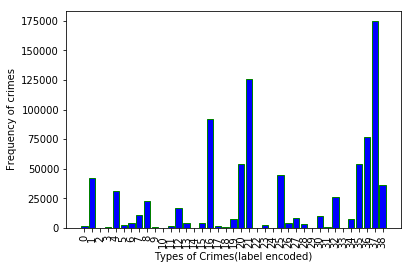

<Figure size 720x720 with 0 Axes>

In [8]:
plt.bar(df1['Category_LE'].unique(),df1['Category_LE'].value_counts(),width = 0.8,facecolor = 'b',edgecolor = 'g' ) 
plt.xticks(df1['Category_LE'].unique(),rotation=90) #for marking the x-axis caliberation with label encoded Category
plt.xlabel('Types of Crimes(label encoded)')
plt.ylabel('Frequency of crimes')
plt.figure(figsize = (10,10))
plt.show()  # a bar plot showing the frequency of crimes for different categories

In [9]:
# Data pre - processing continued
#one-hot encoding for the DayOfWeek column without using sklearn 
df2 = pd.get_dummies(df['DayOfWeek'],prefix='DayOfWeek') 
#print(df2)

target = le.fit_transform(df['PdDistrict'].values) #label encoding being done for target column as the existing data is textual and not numeric
df3 = pd.DataFrame({'Target_PdDistrict':target})
#print(df3)

df_inter1 = pd.concat([df1,df2],axis = 1);
df_inter2 = pd.concat([df_inter1,df3],axis=1);
df_final = pd.concat([df_inter2,df[['X','Y']]],axis=1) # final dataset
#print(df_final) 
# all data has been to processed to numerical form

x = df_final[['Category_LE','DayOfWeek_Friday','DayOfWeek_Monday','DayOfWeek_Saturday',
              'DayOfWeek_Sunday','DayOfWeek_Thursday','DayOfWeek_Tuesday','DayOfWeek_Wednesday','X','Y']] #final set of features dataframe x
y = df_final['Target_PdDistrict'] # final target dataframe y
print(x.shape)
print(y.shape)

(878049, 10)
(878049,)


In [10]:
########################################## Standardistion #####################################################

# standardisation is done to balance the data standardise it according to deviation
# instead of standardisation, normalisation can also be done, one of them can be chosen, here standardisation has been used
print('----------------Standarization----------------')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(x)
print(X_std)
# X_std is now the standardised data

#print('----------------Normalization----------------')
#from sklearn.preprocessing import MinMaxScaler
#mms=MinMaxScaler()
#X_norm=mms.fit_transform(x)
#print(X_norm)


----------------Standarization----------------
[[ 1.65234558 -0.42387962 -0.40090714 ...  2.40737748 -0.10790296
   0.00783182]
 [ 0.15542801 -0.42387962 -0.40090714 ...  2.40737748 -0.10790296
   0.00783182]
 [ 0.15542801 -0.42387962 -0.40090714 ...  2.40737748 -0.05753992
   0.06433461]
 ...
 [-0.31235872 -0.42387962  2.49434319 ... -0.41538978  0.6334027
   0.02023512]
 [ 1.46523088 -0.42387962  2.49434319 ... -0.41538978  1.05704265
   0.02098256]
 [-0.68658811 -0.42387962  2.49434319 ... -0.41538978  0.91227237
  -0.07180843]]


In [11]:
################################ Training data and testing data split ############################################ 
# the standardised data is now split into training and testing data, here for training 70% is being used and 30% for testing purpose
print('--------------Train size:70%, Test Size: 30%-----')
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(X_std,
                    y,test_size=0.3,random_state=123)


--------------Train size:70%, Test Size: 30%-----


In [12]:
############################################ Different strategies for classifying data, implementation of various models ####################
#Perceptron
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.01,random_state=0)
ppn.fit(x_train,y_train)
y_pred_ppn = ppn.predict(x_test)

from sklearn.metrics import accuracy_score
acc_ppn = accuracy_score(y_test,y_pred_ppn)

from sklearn.metrics import classification_report
cr_ppn = classification_report(y_test,y_pred_ppn)

from sklearn.metrics import confusion_matrix
cm_ppn = confusion_matrix(y_test,y_pred_ppn)


print('From Perceptron strategy');
print('Accuracy score:',acc_ppn)
print('Classification report',cr_ppn)
print('Confusion matrix',cm_ppn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


From Perceptron strategy
Accuracy score: 0.2926826490518763
Classification report              precision    recall  f1-score   support

          0       0.77      0.57      0.65     26955
          1       0.27      0.12      0.17     25551
          2       0.54      0.35      0.42     23679
          3       0.23      0.21      0.22     36002
          4       0.21      0.24      0.22     31492
          5       0.14      0.23      0.17     14865
          6       0.70      0.03      0.06     13416
          7       0.43      0.13      0.20     47111
          8       0.56      0.68      0.62     19673
          9       0.14      0.49      0.22     24671

avg / total       0.39      0.29      0.29    263415

Confusion matrix [[15257    46   742  2556  1166  1186     1  1157    23  4821]
 [  450  3080     1  2885  3862   730     0  3964     0 10579]
 [   62     0  8176  3287  2778  2825     0     8  2493  4050]
 [  195   213  1277  7533  5082  6034     0   268    53 15347]
 [    0  2

In [13]:
#logisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=.001,penalty='l2')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_test,y_pred_lr)

from sklearn.metrics import classification_report
cr_lr = classification_report(y_test,y_pred_lr)

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred_lr)


print('From Logistic Regression strategy');
print('Accuracy score:',acc_lr)
print('Classification report',cr_lr)
print('Confusion matrix',cm_lr)



From Logistic Regression strategy
Accuracy score: 0.40434295693107836
Classification report              precision    recall  f1-score   support

          0       0.79      0.66      0.72     26955
          1       0.00      0.00      0.00     25551
          2       0.94      0.22      0.35     23679
          3       0.32      0.34      0.33     36002
          4       0.38      0.33      0.35     31492
          5       0.00      0.00      0.00     14865
          6       0.00      0.00      0.00     13416
          7       0.31      0.88      0.46     47111
          8       0.55      0.99      0.71     19673
          9       0.00      0.00      0.00     24671

avg / total       0.35      0.40      0.33    263415

Confusion matrix [[17916     0     4    44     4     0     0  8951    36     0]
 [  135     0     0   595   125     0     0 24696     0     0]
 [   57     0  5130  8728  1476     0     0  6751  1537     0]
 [    0     0    65 12130  2291     0     0 21511     5     0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
#decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3,criterion='gini')
tree.fit(x_train,y_train)
y_pred_dtc = tree.predict(x_test)

from sklearn.metrics import accuracy_score
acc_dtc = accuracy_score(y_test,y_pred_dtc)

from sklearn.metrics import classification_report
cr_dtc = classification_report(y_test,y_pred_dtc)

from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_dtc)

print('From Decision Tree Classifier strategy');
print('Accuracy score:',acc_dtc)
print('Classification report',cr_dtc)
print('Confusion matrix',cm_dtc)

From Decision Tree Classifier strategy
Accuracy score: 0.7058633714860582
Classification report              precision    recall  f1-score   support

          0       0.94      0.93      0.93     26955
          1       0.82      0.87      0.84     25551
          2       0.59      0.96      0.73     23679
          3       0.72      0.98      0.83     36002
          4       0.82      0.88      0.85     31492
          5       0.00      0.00      0.00     14865
          6       0.58      0.96      0.73     13416
          7       0.60      0.85      0.71     47111
          8       0.00      0.00      0.00     19673
          9       0.00      0.00      0.00     24671

avg / total       0.56      0.71      0.62    263415

Confusion matrix [[25019    15  1716    20     3     0    27   155     0     0]
 [    1 22319     1     0  2346     0     1   883     0     0]
 [  931     2 22704    42     0     0     0     0     0     0]
 [  392     1   138 35414    54     0     0     3     0    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
#kNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_test,y_pred_knn)

from sklearn.metrics import classification_report
cr_knn = classification_report(y_test,y_pred_knn)

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_pred_knn)

print('From KNeighbours strategy');
print('Accuracy score:',acc_knn)
print('Classification report',cr_knn)
print('Confusion matrix',cm_knn)

From KNeighbours strategy
Accuracy score: 0.9504584021411081
Classification report              precision    recall  f1-score   support

          0       0.95      0.98      0.97     26955
          1       0.93      0.97      0.95     25551
          2       0.93      0.94      0.93     23679
          3       0.95      0.96      0.95     36002
          4       0.95      0.96      0.95     31492
          5       0.92      0.93      0.92     14865
          6       0.94      0.91      0.92     13416
          7       0.97      0.95      0.96     47111
          8       0.98      0.94      0.96     19673
          9       0.97      0.93      0.95     24671

avg / total       0.95      0.95      0.95    263415

Confusion matrix [[26495    12   259    52     5     8    16   102     3     3]
 [    7 24730     2     8   210     0     1   298     0   295]
 [  816     0 22223   371     3    52     0    11   203     0]
 [  121     8   756 34619   139   144     0   212     2     1]
 [   10  

In [ ]:
# random forest classifier not executing due to hardware limitations and huge dataset , hence accuracy score through random forest not taken into 
# account for comparision
'''
#random forest classifier 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10000, random_state = 0)
forest.fit(x_train,y_train)
y_pred_forest = forest.predict(x_test)

from sklearn.metrics import accuracy_score
acc_forest = accuracy_score(y_test,y_pred_forest)

from sklearn.metrics import classification_report
cr_forest = classification_report(y_test,y_pred_forest)

from sklearn.metrics import confusion_matrix
cm_forest = confusion_matrix(y_test,y_pred_forest)

print('From Random Forest Classifier strategy');
print('Accuracy score:',acc_forest)
print('Classification report',cr_forest)
print('Confusion matrix',cm_forest)

'''

                                 0
Perceptron                0.292683
Logistic Regression       0.404343
Decision Tree Classifier  0.705863
KNeighbors                0.950458


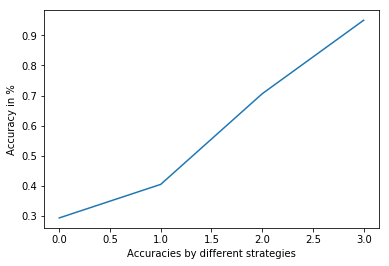

In [35]:
################################################ Comparision of accuracy scores by different models ########################################
from matplotlib import pyplot as plt
acc_name = ['Perceptron','Logistic Regression','Decision Tree Classifier','KNeighbors'] # list of names of different models used
acc = [acc_ppn,acc_lr,acc_dtc,acc_knn] # creating a list of accuracy scores of above models
df_acc = pd.DataFrame(acc,acc_name)
print(df_acc) # printing an index for the line plot

plt.plot(acc) # a line graph has been plotted showing the growth of accuracy score by different strategies as shown in the index 
plt.xlabel('Accuracies by different strategies')
plt.ylabel('Accuracy in %')
plt.show()